In [1]:
#Author: jgathas
#date: 4/28/2024
#class: CS496
#This is a notebook that uses QuTip to make a quantum teleprotation circuit


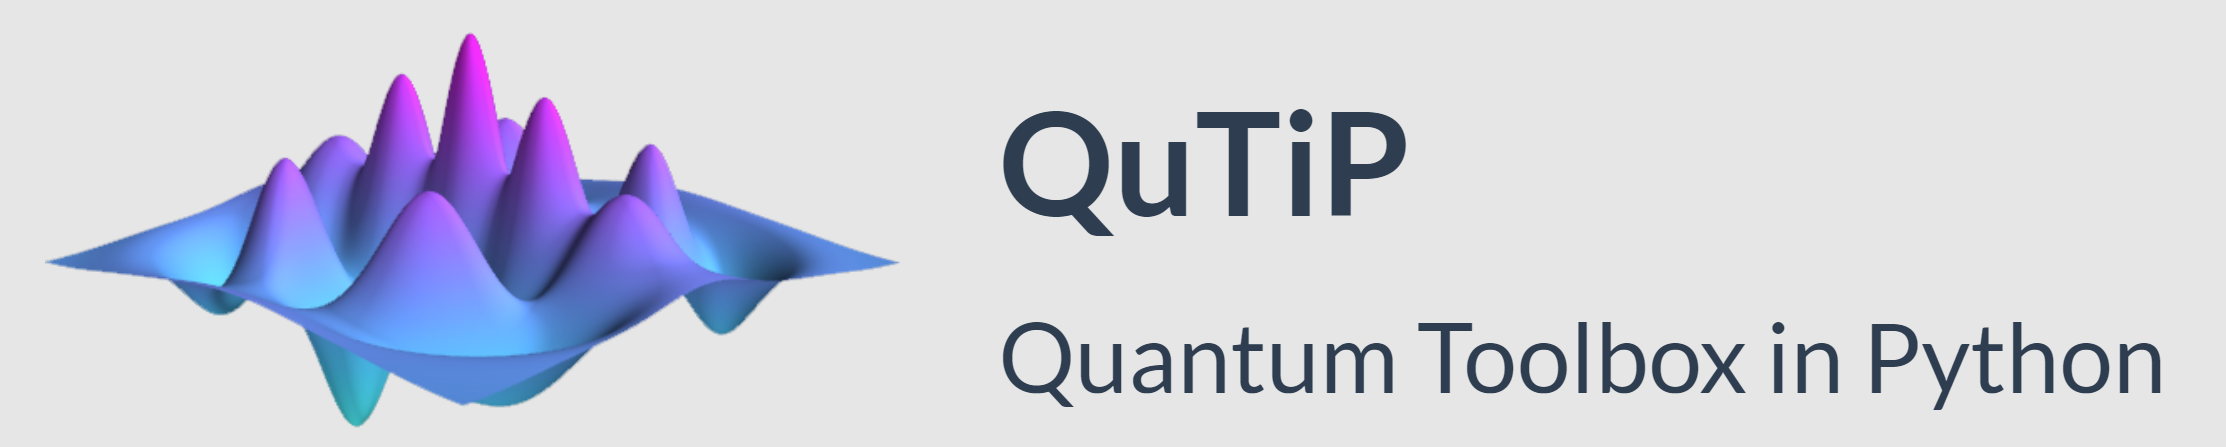

Quantum algorithim, circuit, and simulator using basic python packages: numpy, matplot, etc. <br> QuTiP aims to provide user-friendly and efficient numerical simulations of a wide variety of Hamiltonians.
Be sure to have Qutip Installed before running this notebook. <br>
<br>
To install QuTiP, you can simply use the following two commands in your terminal <br>
pip install qutip <br>
pip install qutip-qip

Note: you will need to install Ghostscript, Imagemagick, and Perl in order to get the circuit schematic drawing to appear in the notebook. Ghostscript tur  <br> Links below: <br>
Ghostscript: https://ghostscript.com/releases/gsdnld.html<br>
Imagemagick: https://imagemagick.org/script/download.php<br>
Perl: https://www.perl.org/get.html<br>


<h1>1). Using QubitCircuit to Make a Quantum Teleportation Circuit</h1>
This is a notebook that uses QuTip to make a quantum teleportation circuit.  We first need to import all necessary math and QuTip libraries. Do perform quantum information processing simulations such as quantum circuits and algorithms, we need to install the extra package qutip-qip. Qutip-qip was made to decrease the size of the core QuTip package by reducing external dependencies. QuTiP-qip is the quantum information processing package, which has 2 approaches for simulating quantum circuits: <br>
-QubitCircuit: which calculates unitary evolution under quantum gates by matrix product <br>
-Processor: which uses open system solvers in QuTiP to simulate noisy quantum devices - issues with this one <br>

In [30]:
#importing necessary packages
import numpy as np
from math import sqrt

from qutip import about, basis, tensor #importing qutip basics
from qutip_qip.circuit import QubitCircuit #creating quatum circuit objects
from qutip_qip.operations import Measurement, cnot, snot  #cnot and snot are only needed to see gate matricies


We will need 2 classical wires and 3 qubit wires to accomplish the Quantum Teleportation circuit. The first qubit represents the state q0 = |psi> that needs to be transferred from Alice to Bob (q1 and q2, respectivly). We can create this quantum circuit simply by making a QubitCircuit object, which has the following strucuture:<br> def __init__( <br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   self,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   N,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   input_states=None,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   output_states=None,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   reverse_states=True,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   user_gates=None,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   dims=None,<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   num_cbits=0,<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; )<br>

In [31]:
#Here we create a QubitCircuit object of 3 qubits and 2 classical btis
teleportation = QubitCircuit(
    3, num_cbits=2, input_states=[r"\psi", "0", "0", "c0", "c1"]  #3 qubits and 2 control classical bits and their names
)

First, we need to create a shared EPR pair between Alice and Bob (|00> + |11>)/2, between qubits q1 and q2. We can do this with a hadamard on Alice's qubit and then a CNOT entagling gate.

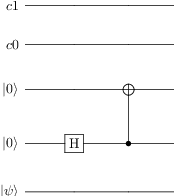

In [32]:
teleportation.add_gate("SNOT", targets=[1])  #SNOT = Hadamrad gate
teleportation.add_gate("CNOT", targets=[2], controls=[1])  #adding CNOT on q2 with q1 as control

#draw circuit up to this point
teleportation.png

If we want to see the operator matrix that is applied from each gate, we can simply call the gate as a function. Note that the CNOT gate requires 2 Qubits, so we need a 4x4 operator matrix. SNOT is on a single qubit, so we only need a 2x2.

In [5]:
cnot()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [6]:
snot()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

We now make q0 interact with Alice's EPR pair qubit, followed by measuring the two qubits that belong to Alice at this point (q0 and q1). The result of the measurement q0 is stored in classical bit c1 and the result of q1 in classical bit c2.

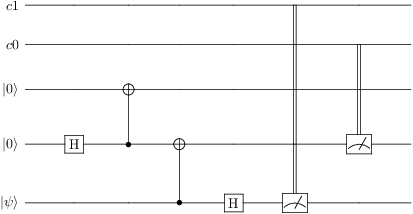

In [33]:
teleportation.add_gate("CNOT", targets=[1], controls=[0])
teleportation.add_gate("SNOT", targets=[0])

teleportation.add_measurement("M0", targets=[0], classical_store=1) #measure q0 and store on c1
teleportation.add_measurement("M1", targets=[1], classical_store=0) #measure q1 and store on c0

#draw circuit up to this point
teleportation.png

Next, we apply an X gate on Bob's qubit (q2) based on the classical control c0 and Z gate based on classical control c1, yeilding the following results:<br>
c1c0 <br>
|00> = No operation<br>
|01> = Z<br>
|10> = X<br>
|11> = ZX<br>

In [34]:
teleportation.add_gate("X", targets=[2], classical_controls=[0]) #add X controlled by c0
teleportation.add_gate("Z", targets=[2], classical_controls=[1]) #add Z controlled by c1

We can see the gates listed in our circuit and the final schematic using the follwoing two line of code:

In [35]:
teleportation.gates #list circuit elements

[Gate(SNOT, targets=[1], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Gate(CNOT, targets=[2], controls=[1], classical controls=None, control_value=1, classical_control_value=None),
 Gate(CNOT, targets=[1], controls=[0], classical controls=None, control_value=1, classical_control_value=None),
 Gate(SNOT, targets=[0], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Measurement(M0, target=[0], classical_store=1),
 Measurement(M1, target=[1], classical_store=0),
 Gate(X, targets=[2], controls=None, classical controls=[0], control_value=None, classical_control_value=1),
 Gate(Z, targets=[2], controls=None, classical controls=[1], control_value=None, classical_control_value=1)]

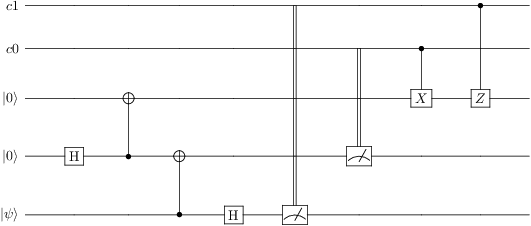

In [36]:
teleportation.png

<h1>2). Testing Our QubitCircuit Quantum Teleportation Circuit </h1>Lets now apply this circuit to an example. Suppose we set the initial state psi to be in the + state

In [38]:
a = 1/sqrt(2) * basis(2,0) + 1/sqrt(2)*basis(2,1)  #defining + state
state = tensor(a, basis(2,0), basis(2,0))  #setting 3 qubits to be + 0 0

We can confirm our state is initialized correctly by observing the measurement statisicits on qubit q0, Note that Qobj has the following attributes: <br>
dimensions of tensor structure <br>
shape of of Qobj data <br>
type of quantum object - bra, ket, super, etc. <br> <br>

We get two objects here, each of a dimension that states there are 3 qubits, each with a 2D Hilbert space. The first object is what would happen if q0 was in the state |0>, the second is when q0 is in the state |1>. q1 and q2 are both |0> in both cases. We can read that we have a probability of 50% to be in each state, showing that we are indeed in the |+> state.


In [39]:
initial_measurement = Measurement("start", targets=[0]) #measure q0, "start specifies measurement at start of circuit, before computation"
initial_measurement.measurement_comp_basis(state) #performs measurement

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.4999999999999999, 0.4999999999999999])

The circuit object QubitCircuit has a method "run" which can run the circuit we previously made when provided with an initial state vector or density matrix and provides the final state as a "result" object. Note: any classical bits can also be explicitly set using the argument cbits. <br> <br>

This output corresponds to the probability amplitudes of each state, ie the first value in data is for |000> and the 6th line is for |101>.

In [40]:
state_final = teleportation.run(state) #run intial state set up on circuit
print(state_final)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


After running that, we can see the measurement stats on the last qubit to see that teleportation did indeed occur. We see that the same two entries with probabilty amplitude 1/sqrt(2) are the two possible convergences, with 50% chance aof each.

In [41]:
final_measurement = Measurement("start", targets=[2]) #Measure q2 to check if the intial q0 value was teleported 
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]],
 [0.4999999999999999, 0.4999999999999999])

Lets do one more example with the intial state of phi being set to 1.

In [43]:
state = tensor(basis(2,1), basis(2,0), basis(2,0)) #set qubits to 1 0 0 -> q0 q1 q2 
initial_measurement = Measurement("start", targets=[0]) #measure intial qubit q0, should be a 1 as it was set
initial_measurement.measurement_comp_basis(state)

([None,
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

In [44]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [45]:
final_measurement = Measurement("start", targets=[2]) #measure state of q2 to check that it matches q0
final_measurement.measurement_comp_basis(state_final)

([None,
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

Another cool feature that QuTip has is to get the circuit stats using the QubitCircuit.run_statistics() feature, which give you all the possible output states of the circuit with their probabilities. The resulting four 25% chances come from the two measurements made on q0 and q1, which Alice does and then classically communicates to Bob. These outcomes correspond to the the four Bell states, which are maximally entangled states.

In [46]:
results = teleportation.run_statistics(state)
results.probabilities

[0.24999999999999994,
 0.24999999999999994,
 0.24999999999999994,
 0.24999999999999994]

In [47]:
results.final_states

[Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]]]

The results above show that there are four possible final states, any permuation of the 3 qubits where q2 must be in state |1>. There is then a 25% chance of the other qubits being in each of the remaining four configurations.

<h1> 3). Making a Noisy Quantum Teleportation Circuit </h1>
<br>
We can modify the gates we use in our teleportation circuit to include some error if we want to try and simulate the circuit using a less perfect processor.
<br>
<br>
First, we will create a function that makes noisy gates of the CNOT and Hadamard. We do this by taking the original matrix operations and by sqrt(1 - chosen_error) and then adding sqrt(error_prob) * a random 2x2 matrix of numbers -1 to 1.

In [48]:
def noisy_hadamard(error_prob):
    # Define the noiseless Hadamard gate
    hadamard_gate = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

    # Construct the noisy Hadamard gate
    noisy_hadamard_gate = np.sqrt(1 - error_prob) * hadamard_gate + np.sqrt(error_prob) * np.random.randn(2, 2)
    
    return noisy_hadamard_gate

def noisy_cnot(error_prob):
    # Define the noiseless CNOT gate
    cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

    # Construct the noisy CNOT gate
    noisy_cnot_gate = np.sqrt(1 - error_prob) * cnot_gate + np.sqrt(error_prob) * np.random.randn(4, 4)
    
    return noisy_cnot_gate


Now we can recreate the same quantum teleportation circuit as before with these new noisy gates. We start again by making the epr pair between Alice and Bob. The way these gates are made, the image appears as a unitarty.

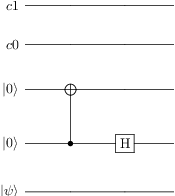

In [49]:
teleportation = QubitCircuit(
    3, num_cbits=2, input_states=[r"\psi", "0", "0", "c0", "c1"]  #3 qubits and 2 control classical bits and their names
)

noisy_cnot_gate = noisy_cnot(0.1)
teleportation.add_gate("CNOT", targets=[2], controls=[1], arg_value=noisy_cnot_gate)

noisy_snot_gate = noisy_hadamard(0.1)
teleportation.add_gate("SNOT", targets=[1], arg_value=noisy_snot_gate)

#teleportation.add_gate("SNOT", targets=[1])  #SNOT = Hadamrad gate
#teleportation.add_gate("CNOT", targets=[2], controls=[1])  #adding CNOT on q2 with q1 as control

#draw circuit up to this point
teleportation.png

We complete the circuit by interacting Alice's and the psi qubit, measure the two, and then add the correction X and Z gates

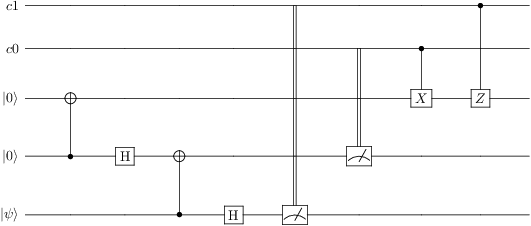

In [50]:
teleportation.add_gate("CNOT", targets=[1], controls=[0], arg_value=noisy_cnot_gate)
teleportation.add_gate("SNOT", targets=[0], arg_value=noisy_snot_gate)

teleportation.add_measurement("M0", targets=[0], classical_store=1) #measure q0 and store on c1
teleportation.add_measurement("M1", targets=[1], classical_store=0) #measure q1 and store on c0

teleportation.add_gate("X", targets=[2], classical_controls=[0]) #add X controlled by c0
teleportation.add_gate("Z", targets=[2], classical_controls=[1]) #add Z controlled by c1

teleportation.png

We can now test our noisy circuit the same was as we did before. Lets try the + state. As we can see, at the start we have a + state at the input.

In [51]:
a = 1/sqrt(2) * basis(2,0) + 1/sqrt(2)*basis(2,1)  #defining + state
state = tensor(a, basis(2,0), basis(2,0))  #setting 3 qubits to be + 0 0

initial_measurement = Measurement("start", targets=[0]) #measure q0, "start specifies measurement at start of circuit, before computation"
initial_measurement.measurement_comp_basis(state) #performs measurement

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.4999999999999999, 0.4999999999999999])

In [54]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [55]:
final_measurement = Measurement("start", targets=[2]) #Measure q2 to check if the intial q0 value was teleported 
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  None],
 [1.0, 0.0])

As you can see from the results, while we expect a + state, we end up with a random 0 or 1. Our circuit no longer works. Lets try one more example starting with the 1 state.

In [56]:
state = tensor(basis(2,1), basis(2,0), basis(2,0)) #set qubits to 1 0 0 -> q0 q1 q2 
initial_measurement = Measurement("start", targets=[0]) #measure intial qubit q0, should be a 1 as it was set
initial_measurement.measurement_comp_basis(state)

([None,
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

In [61]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [62]:
final_measurement = Measurement("start", targets=[2]) #Measure q2 to check if the intial q0 value was teleported 
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  None],
 [1.0, 0.0])

This noisy completely ruins the circuit, showing just how idealized the quantum teleportation circuit really is. The noise error can be adjusted to see what the minimum required noise is to still make this work.

In [29]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.0.1
Numpy Version:      1.24.4
Scipy Version:      1.9.1
Cython Version:     0.29.32
Matplotlib Version: 3.5.2
Python Version:     3.9.13
Number of CPUs:     8
BLAS Info:          OPENBLAS
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  C:\Users\jgath\anaconda3\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
